In [11]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import io

In [12]:
df=pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [13]:
df.columns = df.columns.str.strip()
numeric_columns = [
    'no_of_dependents',
    'income_annum',
    'loan_amount',
    'loan_term',
    'cibil_score',
    'residential_assets_value',
    'commercial_assets_value',
    'luxury_assets_value',
    'bank_asset_value'
]
data_numeric = df[numeric_columns]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)


Cluster Analysis:
          no_of_dependents  income_annum   loan_amount  loan_term  cibil_score  \
Cluster                                                                         
0                2.394471  1.909373e+06  5.618611e+06  10.937289   610.826703   
1                2.434039  8.354967e+06  2.545147e+07  11.083062   599.255700   
2                2.648909  5.459499e+06  1.605770e+07  10.721438   590.105905   

         residential_assets_value  commercial_assets_value  \
Cluster                                                      
0                    2.683817e+06             1.697707e+06   
1                    1.365383e+07             9.094788e+06   
2                    7.158922e+06             4.842298e+06   

         luxury_assets_value  bank_asset_value  
Cluster                                         
0               5.539852e+06      1.777478e+06  
1               2.545586e+07      8.481352e+06  
2               1.610963e+07      5.259564e+06  


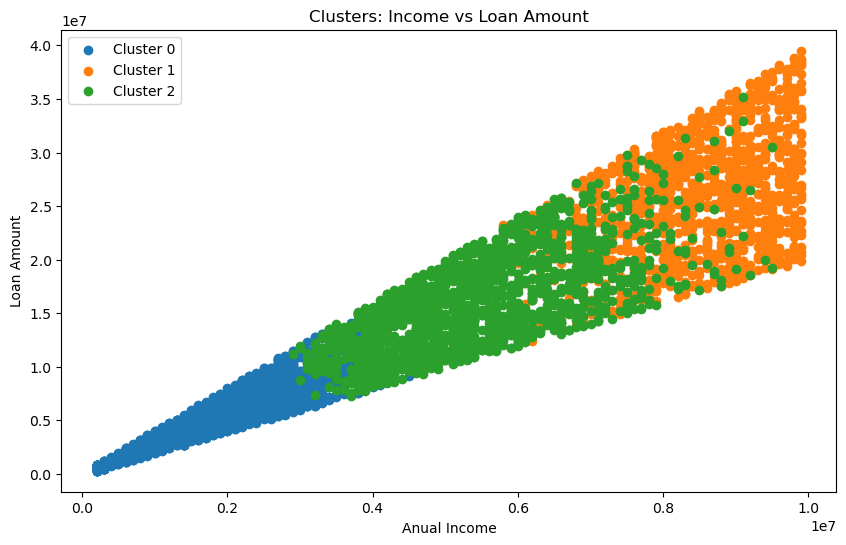

In [14]:
KMeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = KMeans.fit_predict(data_scaled)
cluster_analysis = df.groupby('Cluster')[numeric_columns].mean()
print("Cluster Analysis:\n", cluster_analysis)
plt.figure(figsize=(10, 6))
for cluster in range(3):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(
    cluster_data['income_annum'],
    cluster_data['loan_amount'],
    label=f'Cluster {cluster}'
    )
   
plt.title('Clusters: Income vs Loan Amount')
plt.xlabel('Anual Income')
plt.ylabel('Loan Amount')
plt.legend()
plt.show()